# MNIST Hand Writing

In [40]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
mnist

/Users/fifi/Library/Caches/pypoetry/virtualenvs/ml-book-oreilly-scikit-keras-tf-wYfakSSe-py3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [41]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

# This dataset has 70,000 images, and each image has 784 features.

((70000, 784), (70000,))

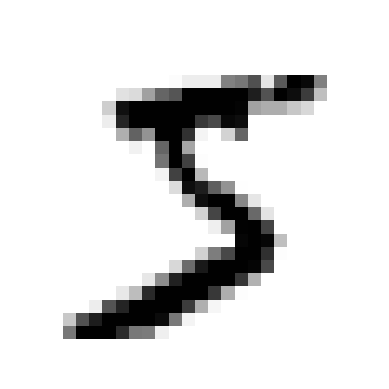

In [42]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

plot_digit(X[0])

In [43]:
y[0]
# this is a 5

'5'

In [44]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier
# To reccognize 5s and Non-5s

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

# Stochastic Gradient Descent (SGD) classifier
# capable of handling very large datasets efficiently

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Now we can use it to detect images of the number 5:
sgd_clf.predict([X[0]])

array([ True])

In [45]:
# Let's evaluate this model's performance.
# Implementing Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# Above 95% accuracy
# Let's try a dumb classifier that just classifies every single image in the "not-5" class:

array([0.95035, 0.96035, 0.9604 ])

In [46]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
any(dummy_clf.predict([X_train]))

False

In [47]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# 90% accuracy
# If we just guess "not-5" every time, we will be right about 90% of the time.

array([0.90965, 0.90965, 0.90965])

In [48]:
# Confusion Matrix
# A much better way to evaluate the performance of a classifier is to look at the confusion matrix.
# The general idea is to count the number of times instances of class A are classified as class B.

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

# First row considers non-5 images (negative class):
# 53,272 were correctly classified as non-5s (true negatives)
# 687 were wrongly classified as 5s (false positives)
# Second row considers the images of 5s (positive class):
# 1891 were wrongly classified as non-5s (false negatives)
# 3530 were classified as 5s (true positives) 

# The best cm would only have true positives and true negatives

array([[53892,   687],
       [ 1891,  3530]])

In [49]:
y_train_perfect_predictions = y_train_5
cm = confusion_matrix(y_train_5, y_train_perfect_predictions)
cm

# The perfect cm

array([[54579,     0],
       [    0,  5421]])

In [50]:
# Precision and Recall
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
# precision is the accuracy of the positive predictions
# recall is the ratio of positive instances that are correctly detected by the classifier

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [51]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [52]:
# F1 score
# F1 = 2 / ((1/precision) + (1/recall))
# Combines precision and recall into a single metric

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

# Sometimes we would like to have a more precise control over precision/recall tradeoff.
# ex. Classifier for videos that are safe for kids.
# We would prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision)
# rather than a classifier that has a much higher recall but lets a few really bad videos show up (low precision)

# On the other hand, suppose we are building a classifier to detect shoplifters on surveillance images:
# It is probably fine if our classifier has only 30% precision as long as it has 99% recall
# (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught)

0.7325171197343846

![Alt text](image-1.png)

In [53]:
y_scores = sgd_clf.decision_function([X_train[0]])
y_scores

array([2164.22030239])

In [54]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [55]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

# Proof that raising the threshold decreases recall

array([False])

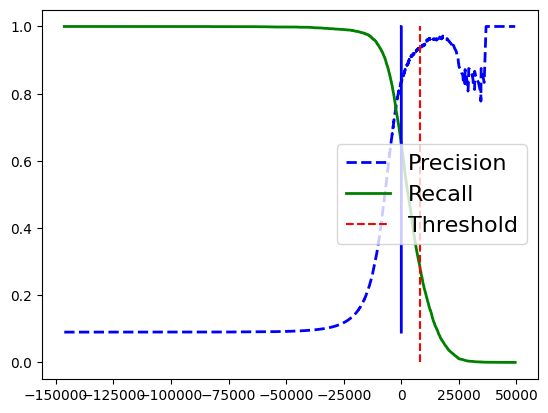

In [56]:
# How to decide which threshold to use?
# Use cross_val_predict() to get the scores of all instances in the training set, but specify that you want to return decision scores instead of predictions:

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# Calculate precision and recall for all possible thresholds using the precision_recall_curve() function:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1, colors='r', linestyles='dashed', label='Threshold')
plt.legend(loc="center right", fontsize=16)

plt.plot(recalls, precisions, "b-", linewidth=2, label='Precision vs Recall')
plt.show()

# Precision really starts to fall sharply around 80% recall
# We will probably want to select a precision/recall tradeoff just before that drop
# ex. 60% precision


In [57]:
# Let's suppose we decide to aim for 90% precision

import numpy as np
idx_for_90_precision = np.argmax(precisions >= 0.90)
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439566

In [58]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [59]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

# Precision is 90% and recall is 48%

0.4799852425751706

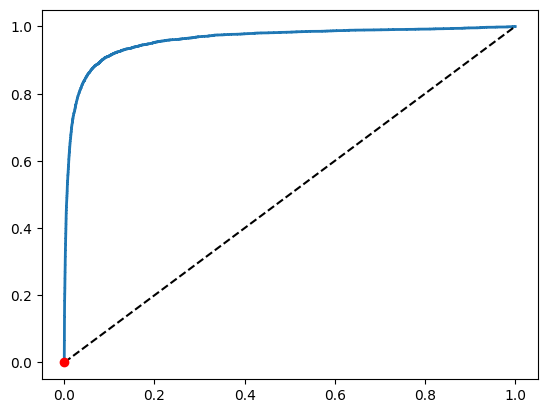

In [60]:
# ROC Curve - Receiver Operating Characteristic
# Similar to precision/recall curve, but instead of plotting precision versus recall, ROC curve plots the true positive rate (recall) against the false positive rate (FPR).

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

idx_for_threshold_at_90 = np.argmax(thresholds >= threshold_for_90_precision)
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.plot([fpr_90], [tpr_90], 'ro', label='Threshold at 90% Precision')

In [61]:
# The higher the recall (TPR), the more false positives (FPR) the classifier produces
# The dotted line represents the ROC curve of a purely random classifier
# A good classifier stays as far away from that line as possible (toward the top-left corner)
# One way to compare classifiers is to measure the area under the curve (AUC)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [62]:
# Use PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives
# Otherwise, use ROC curve

# Let's train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

# The predict_proba() method returns an array containing a row per instance and a column per class,
# each containing the probability that the given instance belongs to the given class

y_probas_forest[:2] # score = proba of positive class

# The model predicts 89% probability that the first image is a 5
# It also predicts 99% probability thatvthe second image is not a 5

array([[0.11, 0.89],
       [0.99, 0.01]])

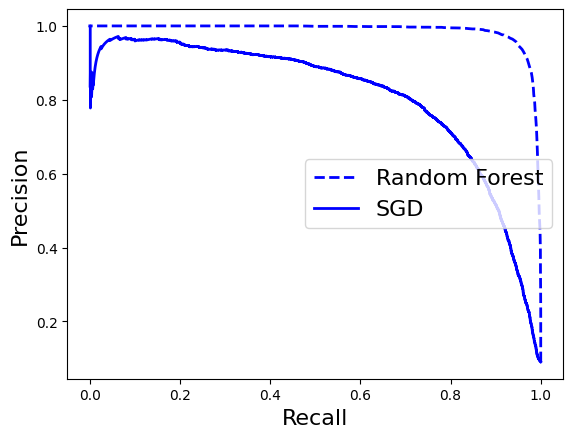

In [63]:
# The second column is the probability that the image belongs to the positive class (5)
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

plt.plot(recalls_forest, precisions_forest, "b--", label="Random Forest", linewidth=2)
plt.plot(recalls, precisions, "b-", linewidth=2, label='SGD')
plt.legend(loc="center right", fontsize=16)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.show()

# Random Forest Classifier is superior to SGD Classifier because its ROC curve is much closer to the top-right corner

In [64]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [65]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [66]:
# Multiclass Classification
# Some algorithms (Random Forest, Naive Bayes) are capable of handling multiple classes directly
# Others (Support Vector Machine, Linear Classifier) are strictly binary classifiers
# However, there are strategies that we can use to perform multiclass classification using multiple binary classifiers

# ex. One-versus-the-rest (OvR) strategy
# Train 10 binary classifiers, one for each digit (0-detector, 1-detector, etc.)
# Then when we want to classify an image, we get the decision score from each classifier for that image and select the class whose classifier outputs the highest score
# OvR is preferred for algorithms that do not scale well with the size of the training set (SVN)
# There are more strategies: OvO, OvR/OvA


# Scikit automatically detects when we try to use a binary classification algorithm for a multiclass classification task
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])
svm_clf.predict([X_train[0]])

# We trained SVC on a range of 0-9, it used the OvO strategy
# It trained 45 binary classifiers, got their decision scores for the image, and selected the class that won the most duels

array(['5'], dtype=object)

In [67]:
some_digit_scores = svm_clf.decision_function([X_train[0]])
some_digit_scores.round(2)

# Returns 10 scores per instance (one per class)
# The highest score - 9.3 - is the one corresponding to class 5

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [68]:
class_id = np.argmax(some_digit_scores)
class_id

5

In [69]:
# When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [70]:
svm_clf.classes_[class_id]

'5'

In [71]:
# If you want to change the classifier to use OvR instead of OvO, you can use the OneVsRestClassifier class
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])
ovr_clf.predict([X_train[0]])

array(['5'], dtype='<U1')

In [72]:
len(ovr_clf.estimators_)
# 10 estimators, one per class

10

In [73]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X_train[0]])
# Wrong prediction

array(['3'], dtype='<U1')

In [74]:
sgd_clf.decision_function([X_train[0]])

# The classifiers are not confident about their predictions

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [75]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
# The accuracy is above 84% on all test folds

array([0.87365, 0.85835, 0.8689 ])

In [76]:
# We can improve the accuracy by scaling the inputs

from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

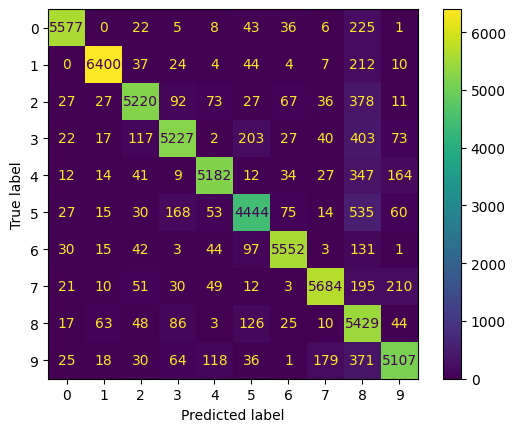

In [77]:
# Error Analysis
# Let's assume we found a promising model and we want to find ways to improve it
# One way to do this is to analyze the types of errors it makes
# First, we can look at the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()
# Looks pretty good, since most images are on the main diagonal

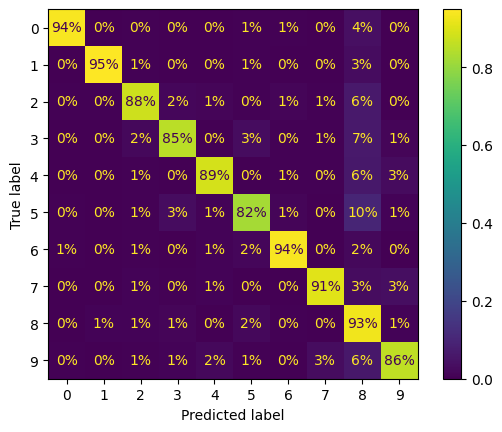

In [78]:
# Display percentages instead of absolute numbers
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format=".0%")
plt.show()

In [82]:
# Multilabel Classification
# Classification system that outputs multiple binary tags
# ex. Face recognition system that tags people on a photo [Alice, Bob, Charlie] [True, False, True]

import numpy as np

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7') # True for all 7s, 8s, 9s
y_train_odd = (y_train.astype(int) % 2 == 1) # True for all odd digits
y_multilabel = np.c_[y_train_large, y_train_odd] # 2 target labels for each digit image

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([X_train[0]])

# The digit 5 is not large (False) and odd (True)

array([[False,  True]])

In [83]:
# There are many ways to evaluate a multilabel classifier
# One approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier),
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')
# This assumes that all labels are equally important, which may not be the case

0.976410265560605

In [84]:
# ClassifierChain class
# It uses the output of the previous classifier as input features to the next classifier

# When there are more images of Alice than Bob or Charlie, the classifier needs to be weighted to give more weight to the classifier that predicts Alice
# One way to do this is to give each label a weight equal to its support (the number of instances with that target label)
# cv=3 will split the training set into 3 folds and make predictions for each fold using the other folds
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

chain_clf.predict([X_train[0]])
# Correct prediction

array([[0., 1.]])

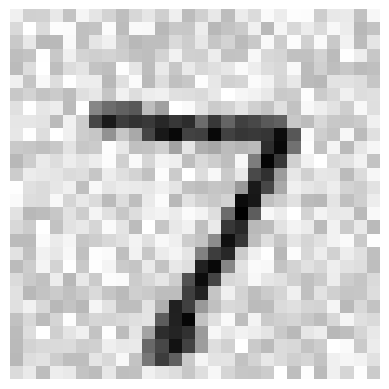

In [88]:
# Multioutput Classification
# Generalization of multilabel classification where each label can be multiclass (more than two possible values)
# ex. Removing noise from images

np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

plot_digit(X_test_mod[0])

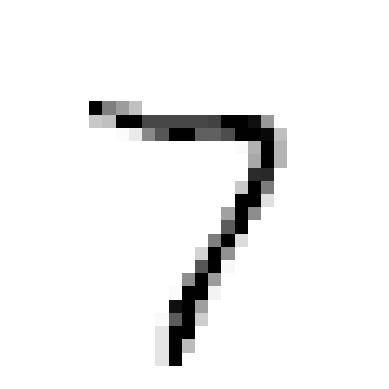

In [87]:

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()